<div style="text-align: right">Ioannis Karakasoglou Breier</div> 

# Statistical Analysis of the Stroop Effect

### Background Information
---

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:green">PURPLE</span>, <span style="color:navy">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### Variables
---


- The independent variable is the type of task (word-color congruency condition)
- The dependent variable is the performance of each individual - _response time measured in seconds_ - on the task.

Each row of the dataset we will use contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

### Hypotheses
---
We want to evaluate the effect size of the task type on the performance of the students and assess whether the difference in our sample is because of the fact the congruent and incongruent populations are significantly different.

$\mu_{C}$: The congruent population's response time mean  
$\mu_{I}$: The incongruent population's response time mean  

We will test the following hypotheses:

$H_0$: The null hypothesis, that the congruent and incongruent populations are not significantly different $\rightarrow  \mu_{C} - \mu_{I} = 0$    

$H_A$: The alternative hypothesis, that the congruent and incongruent populations are significantly different $\rightarrow \mu_{C} - \mu_{I} \neq 0$

In this case:

- The sample size is below 30
- We don't know the population's standard deviation
- The same subject is assigned two conditions

Therefore, we will conduct a _Dependent t-test for Paired Samples_.

###  Descriptive Statistics
---

In [4]:
var

,Congruent,Incongruent
Sample Size n,24.000,24.000
Mean - X,14.051,22.016
Std. Deviation S,3.559,4.797
Min,8.630,15.687
25% Qt,11.895,18.717
Median,14.356,21.018
75% Qt,16.201,24.052
Max,22.328,35.255


- The congruent task sample has a mean of $\bar x_{C} =$ {{xC}} seconds and a standard deviation $S_{C} = $ {{SC}} seconds.
- The incongruent task sample has a mean of $\bar x_{I} =$ {{xI}} seconds and a standard deviation $S_{I} =$ {{SI}} seconds.

### Visualizations
---
- In the density histogram below we observe that both samples look normally distributed with a similar variance.The incongruent task distribution of performance times  seems to have a small bimodal peak around 35 seconds
- In both the histogram and the boxplot it is obvious the the mean , the median and the IQR of measured times for the incongruent task is higher than those of the congruent task.

{{fig}}

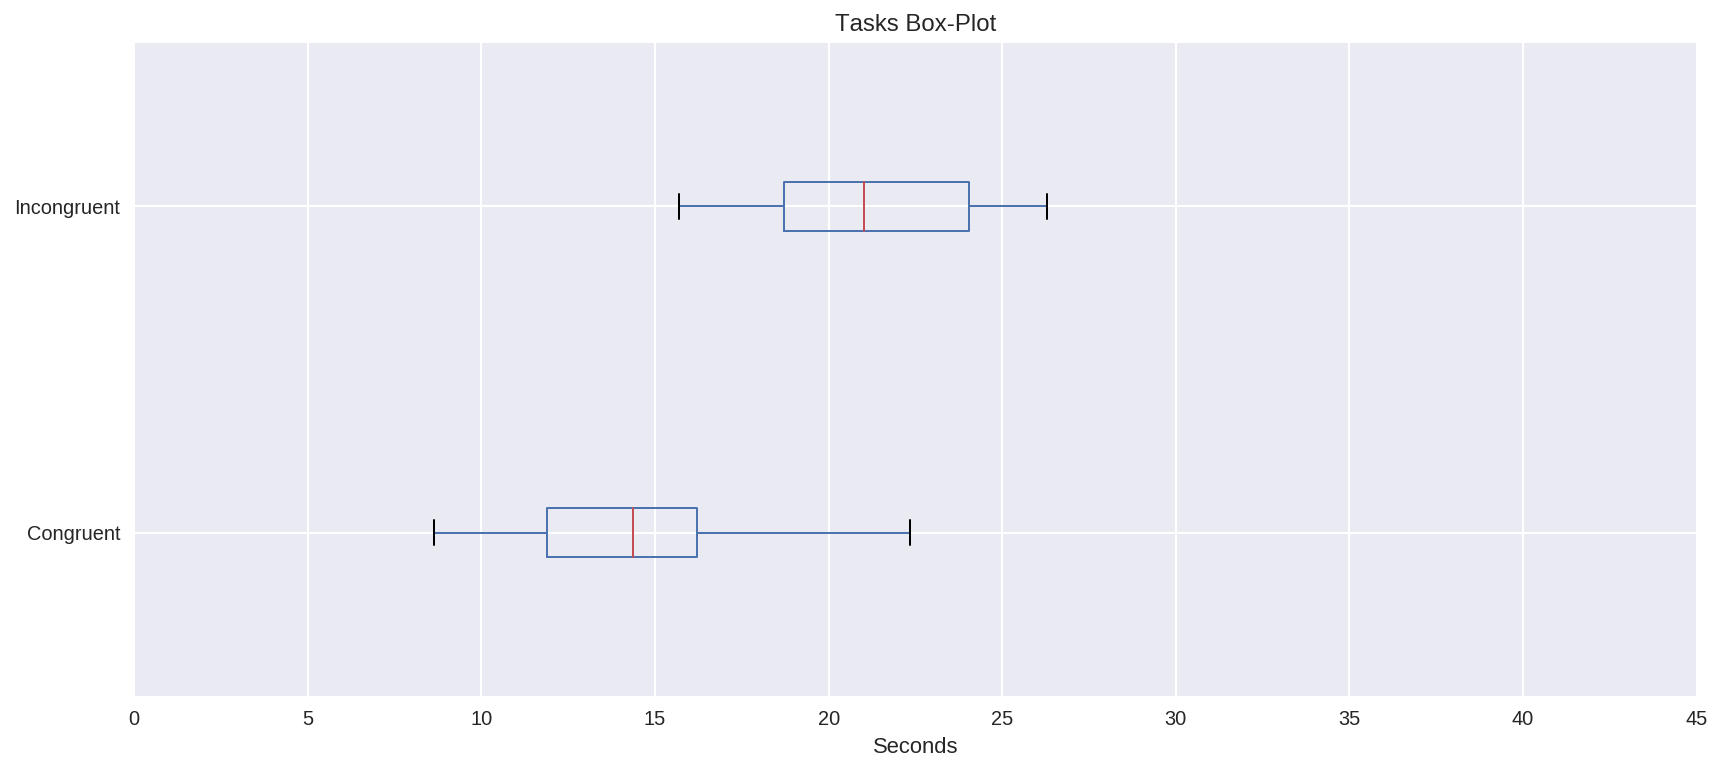

In [8]:
st.plot(kind='box', vert=False, figsize=(14,6))
plt.title('Tasks Box-Plot')
plt.xlabel('Seconds')
plt.xlim(0,45);

### Statistical Test
---

**Two-tailed Dependent t-Test for Paired Samples with a 99% Confidence level**

Degrees of Freedom : df = {{dof}}  
Alpha- level       : a = .01  
t-critical values  : $t_c$ = (-{{t_crit}} ,  +{{t_crit}})  
t-Statistic(df)    : t({{dof}}) = {{t}}   
p-Value            : p < 0.0001  

We observe the the t-Statistic is clearly smaller the the negative t-critical value and in the critical region with a p-value < 0.0001 and therefore _we reject the Null Hypothesis with a 99% Confidence level_ and conclude that there is a significant difference in the scores for congruent  and incongruent tasks.   

The results confirmed our observations and expectations that there is indeed a statistically significant difference(increase)) in the response time to perform the incongruent tasks compared to the congruent tasks.

### Conclusions / Additional Ideas
---

The interference between what the words say and the color of the words seem to confuse the brain.
There are two theories that may explain the Stroop effect:

- Speed of Processing Theory: the interference occurs because words are read faster than colors are named.
- Selective Attention Theory: the interference occurs because naming colors requires more attention than reading words.

Alternative tasks to try:

- Use non-color words such as "dog" or "house."
- Use emotional words such as "sad" or "happy" or "depressed" or "angry."

### Sources

- http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html
- https://faculty.washington.edu/chudler/words.html#seffect
- Udacity Descriptive and Inferential Statistics courses
- http://www.statisticshowto.com/probability-and-statistics/

### Appendix
Code used for calculations and visualizations

In [9]:
import math
import statistics as stat
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-notebook')

#get the data
st = pd.read_csv('stroopdata.csv')

#Get the summary statistics
var = st.describe()

#Change the index labels and round the values reported
var.index = ['Sample Size n', 'Mean - X', 'Std. Deviation S', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
var = var.round(decimals=3)

#Get the values from the stats table
nC = int(var.iloc[0,0]); xC = round(float(var.iloc[1,0]),3)
SC = round(float(var.iloc[2,0]),3)

nI = var.iloc[0,1] ; xI = round(float(var.iloc[1,1]),3)
SI = round(float(var.iloc[2,1]),3)

#plot the density histogram
fig = plt.figure('1', figsize=(14,6))
ax1 = fig.add_subplot(111)
plt.title('Tasks Histogram and KDE Plot')
plt.xlabel('Seconds')
plt.ylabel('Density')
sns.distplot(st[[0]],ax=ax1)
sns.distplot(st[[1]],ax=ax1, color='red')
plt.text(x=10, y=0.04, s= "Congruent",color='blue' )
plt.text(x=20, y=0.04, s= "Incongruent", color='red');

#plot the boxplot
st.plot(kind='box', vert=False, figsize=(14,6))
plt.title('Tasks Box-Plot')
plt.xlabel('Seconds')
plt.xlim(0,45);

# get the critical t values for a one tailed positive test
dof = int(nC-1)
a= 0.01 # 
tails =  2

t_crit = round(float(stats.t.isf([a/tails], dof)[0]),2)

#Calculate the t-statistc
t = round(float(stats.ttest_rel(a = st[[0]],
                b = st[[1]])[0][0]),2)